## Name: [Mazen Mobtasem Mohamed]
## ID: [18100142]

# <center><font color=darkred>Assignment 2 </font>

# <font color=darkred size=4>1-Needed Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte,img_as_float
from skimage import data, io, filters
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap
from skimage.exposure import rescale_intensity
from skimage.filters import laplace ,sobel, roberts
from scipy import ndimage
from scipy.fftpack import fft , fft2 ,fftshift , ifftshift , ifft2
from skimage.filters import gaussian

## Noisy Image Rendering:

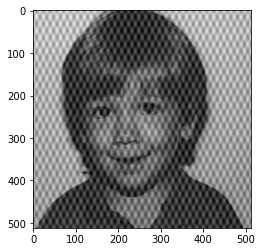

In [2]:
img = io.imread('boy_noisy.png')
plt.imshow(img,'gray',vmin=0, vmax=255 )
plt.show()

# Task 1:
     You will consider the effects of additive noise and the use of DFT to remove this kind of noise. Using frequency domain filtering, devise a procedure for removing the noise and show your results. For comparison purposes, remove the noise in the spatial domain by convolving the noisy image with Average filter (e.g., 7 x 7 and 15 x 15). Compare resulting images of both spatial and frequency domain filtering. Also, you can elaborate on differences in the jupyter notebook as a comment.

# <font color=darkred size=4>1-Solution 

In [3]:
img1 = np.copy(img)

In [4]:
F=fft2(img1, (512,512))
F2=fftshift(F)

In [5]:
F2[230:280,:226] = 0
F2[230:280,286:] = 0

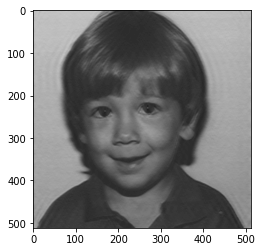

In [6]:
img3 = ifftshift(F2)
F = ifft2(img3)
F = np.abs(F)
plt.imshow(F,'gray',vmin=0, vmax=255)

In [7]:
#Convolution Function
def Conv(img,kernel):
    img1 = np.zeros(img.shape)
    irow = img1.shape[0]
    icolumn = img1.shape[1]
    krow = kernel.shape[0]
    kcolumn = kernel.shape[1]
    for i in range(krow//2,irow-(krow//2)):
      for j in range(kcolumn//2,icolumn-(kcolumn//2)):
        sum=0
        for k in range(-(krow//2),(krow//2)+1):
          for l in range(-(kcolumn//2),(kcolumn//2)+1):
            sum += (img[i+k][j+l])*kernel[k][l]
        img1[i][j] = sum
    return img1 

In [8]:
imge = np.copy(img)

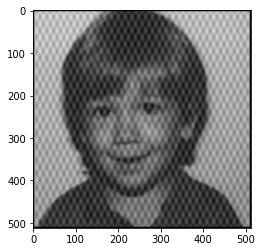

In [9]:
kernel=np.array([[1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                 [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                 [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                 [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                 [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                 [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                 [1/49,1/49,1/49,1/49,1/49,1/49,1/49]])

imge2 = Conv(imge, kernel)
plt.imshow(imge2,'gray',vmin=0, vmax=255)

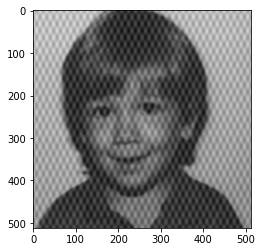

In [10]:
import cv2
Test = np.copy(img)
Test = cv2.blur(Test,(7,7))
plt.imshow(Test,'gray',vmin=0, vmax=255)

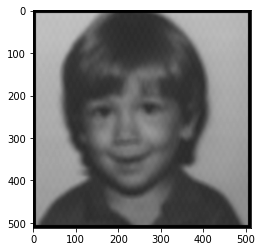

In [11]:
imge = np.copy(img)
kernel=np.array([[1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225],
                 [1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225,1/225]])

imge3 = Conv(imge, kernel)
plt.imshow(imge3,'gray',vmin=0, vmax=255)

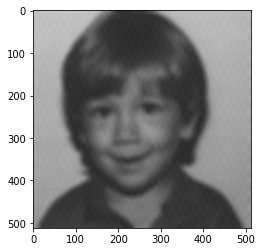

In [12]:
Test = np.copy(img)
Test = cv2.blur(Test,(15,15))
plt.imshow(Test,'gray',vmin=0, vmax=255)

The following images show that in the frequency domain the image has been cleaned while in the spatial domain the noise still exists but is lighter the more blur we add to the image

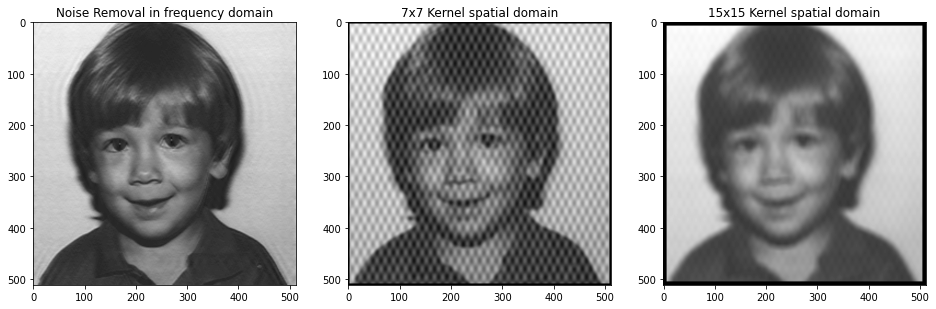

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_size_inches(16, 8)
ax1.imshow( F ,'gray')
ax1.set_title('Noise Removal in frequency domain')
ax2.imshow( imge2 ,'gray')
ax2.set_title('7x7 Kernel spatial domain')
ax3.imshow( imge3 ,'gray')
ax3.set_title('15x15 Kernel spatial domain')
plt.show() 

# Task 2:
    Write your own function to perform image sharpening on the same image supplied in Task 1. However, you will need to remove  noise first before applying image sharpening.
    Your script should apply the following steps:
    1) Apply smoothing first to produce a denoised image.
    2) Apply any edge detection filter (Implementation of Laplace for example) to generate edges to produce an edge image.
    3) Add the edge image to the original image to produce a sharpened image.



# <font color=darkred size=4>2-Solution

In [14]:
def sharpening(img):
  image = np.copy(img)
  laplaceKernel = np.array([[ 0,  1,  0],
                            [ 1,  -4,  1],
                            [ 0,  1,  0]])

  Edgeimage = Conv(F, laplaceKernel)
  Finalimg = F + Edgeimage
  return Finalimg

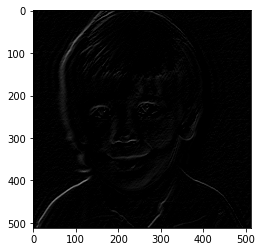

In [15]:
#The Edges image
plt.imshow(Conv(F, np.array([[ 0,  1,  0],
                            [ 1,  -4,  1],
                            [ 0,  1,  0]])),'gray',vmin=0, vmax=255)

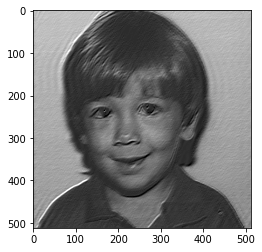

In [16]:
imge = np.copy(img)
sharp = sharpening(imge)
plt.imshow(sharp,'gray',vmin=0, vmax=255)